# Seattle Airbnb Data

The data I used in this notebook refer to over 3800 accommodations that where enlisted to Airbnb in Seattle during 2016. They describe a wide variety of features: not only information about hosts, locations and fares applied to each listing, but also their average ratings and availability period. These datasets are available for free download at https://www.kaggle.com/datasets/airbnb/seattle, where you can find more details and other interesting studies about them.

## Do ratings depend on the location of the listings?

First I was intended to understand if ratings heavily depend on where an accommodation is located. 

Indeed, one can expect that the overall experience of a stay is strongly influenced by one of the following aspects: 
- how far the location is from the airport
- how easy is to reach the main attractions or the business district of the city
- how much is the neighborhood safe when coming back at night

But is this true according to data? 

#### Imports

Read the necessary libraries and import data from ***listings.csv*** file

##### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

##### Import Datasets

In [2]:
df_listings = pd.read_csv('./listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### Data Exploration and Pre-Processing

In [3]:
df_listing_columns = pd.DataFrame(df_listings.columns)
df_listing_columns

,0
0,id
1,listing_url
2,scrape_id
3,last_scraped
4,name
5,summary
6,space
7,description
8,experiences_offered
9,neighborhood_overview


##### Remove records with average rating missing

Since we are interested in studying the rating scores of the listings, we can remove from the dataset all listings that are not rated

In [4]:
df_listings.isnull().mean()

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
experiences_offered                 0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
thumbnail_url                       0.083814
medium_url                          0.083814
picture_url                         0.000000
xl_picture_url                      0.083814
host_id                             0.000000
host_url                            0.000000
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_respo

In [5]:
df_ratedListings = df_listings.dropna(subset = ['review_scores_rating'])

##### Compute the average rating

The average rating for all city is 94.5 out of 100

In [6]:
avg_rating = df_ratedListings.review_scores_rating.mean()
avg_rating

94.53926206244087

### Which neighborhood has the highest average ratings?

All the meaningful information about the location of each listing is stored in the fileds
- neighbourhood_cleansed
- neighbourhood_group_cleansed
- latitude
- longitude

##### Average Rating by Neighbourhood

Define a data frame to store statistics for each neighborhood.

Compute the average rating for each neighborhood using the field ***review_scores_rating***

In [7]:
avg_rating_neighbourhood = pd.DataFrame(df_ratedListings.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean().sort_values(ascending=False))
avg_rating_neighbourhood

,review_scores_rating
neighbourhood_cleansed,
Arbor Heights,98.000000
Riverview,97.250000
Southeast Magnolia,97.214286
Madrona,97.100000
Harrison/Denny-Blaine,97.083333
Genesee,96.933333
North Beach/Blue Ridge,96.909091
Laurelhurst,96.777778
Whittier Heights,96.666667


Compute the gap between the average rating for each neighborhood and the city average

In [8]:
avg_rating_neighbourhood['gap'] = avg_rating_neighbourhood - avg_rating
avg_rating_neighbourhood['gap']

neighbourhood_cleansed
Arbor Heights                3.460738
Riverview                    2.710738
Southeast Magnolia           2.675024
Madrona                      2.560738
Harrison/Denny-Blaine        2.544071
Genesee                      2.394071
North Beach/Blue Ridge       2.369829
Laurelhurst                  2.238516
Whittier Heights             2.127405
North Delridge               2.060738
Westlake                     1.960738
North College Park           1.889309
Windermere                   1.835738
Broadview                    1.835738
Leschi                       1.786825
Yesler Terrace               1.648238
Meadowbrook                  1.603595
Sunset Hill                  1.594071
Fauntleroy                   1.571849
Minor                        1.509125
East Queen Anne              1.432569
Alki                         1.353595
Fremont                      1.266708
West Queen Anne              0.969829
Gatewood                     0.960738
South Delridge             

Compute the number of listings available for each neighborhood

In [9]:
avg_rating_neighbourhood['listings_number'] = df_ratedListings.groupby(['neighbourhood_cleansed'])['id'].count().sort_values(ascending=False)
avg_rating_neighbourhood['listings_number']

neighbourhood_cleansed
Arbor Heights                  3
Riverview                      8
Southeast Magnolia            14
Madrona                       40
Harrison/Denny-Blaine         12
Genesee                       30
North Beach/Blue Ridge        11
Laurelhurst                    9
Whittier Heights              24
North Delridge                25
Westlake                      10
North College Park            14
Windermere                     8
Broadview                     16
Leschi                        46
Yesler Terrace                16
Meadowbrook                    7
Sunset Hill                   15
Fauntleroy                     9
Minor                        124
East Queen Anne               71
Alki                          28
Fremont                      134
West Queen Anne               55
Gatewood                      16
South Delridge                10
Fairmount Park                26
Montlake                      16
Loyal Heights                 43
Seaview             

The following bar plot shows the gap between the average rating for each neighborhood and the city average. 

The color of the bars represents the number of listings for available for each neighborhood:
- the red bars correspond to neighborhoods with the less listings
- the green bars correspond to neighborhoods with the more listings

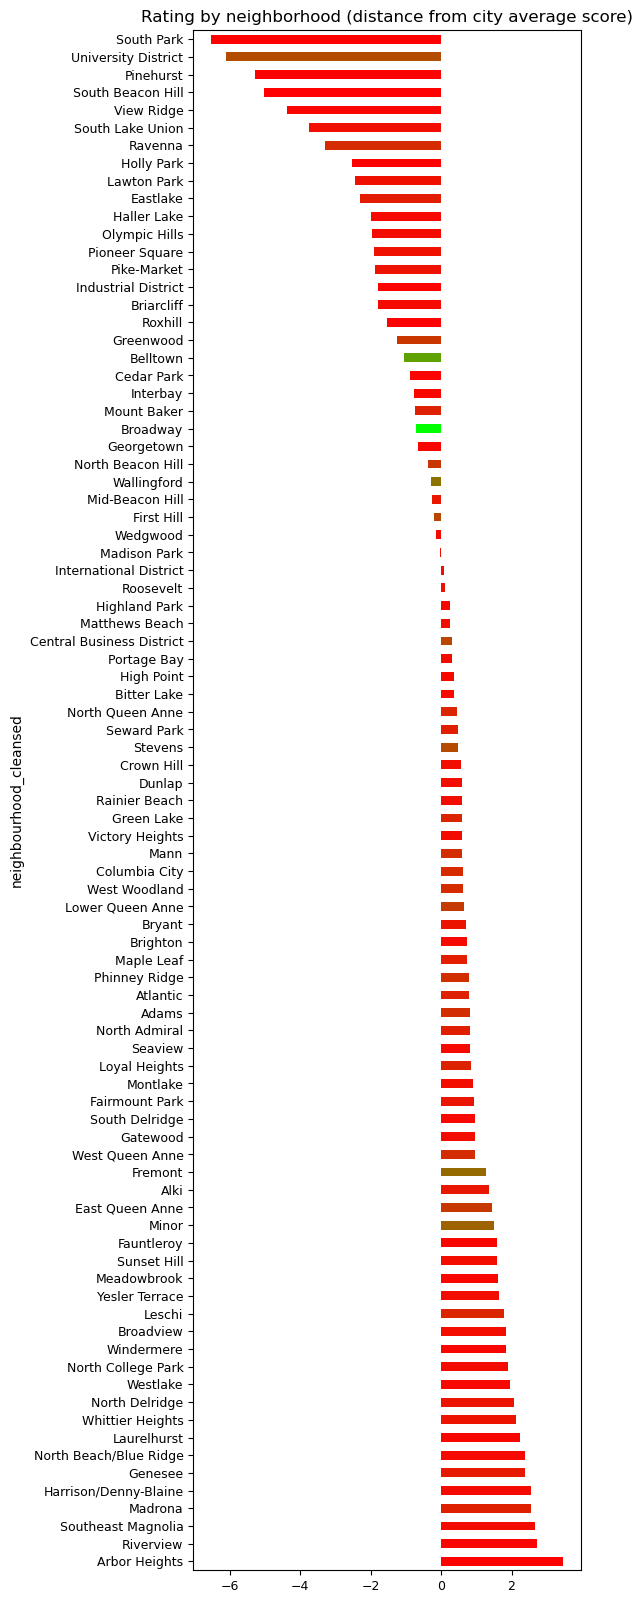

In [10]:
gradient = avg_rating_neighbourhood.listings_number / max(avg_rating_neighbourhood.listings_number)
colors = [(1-x, x, 0) for x in gradient]
avg_rating_neighbourhood.plot.barh(y = 'gap', color=colors,  legend=False, figsize = (5,20)).tick_params(axis='both', labelsize=9);
plt.title("Rating by neighborhood (distance from city average score)");

##### Average Rating by Group of Neighbourhoods

Define a data frame to store statistics for each group of neighborhoods.

Compute the average rating for each group of neighborhoods using the field ***review_scores_rating***.

In [11]:
avg_rating_neighbourhood_gr = pd.DataFrame(df_ratedListings.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].mean())
avg_rating_neighbourhood_gr

,review_scores_rating
neighbourhood_group_cleansed,
Ballard,95.533679
Beacon Hill,94.019417
Capitol Hill,94.184783
Cascade,92.461538
Central Area,96.009404
Delridge,95.861538
Downtown,93.958333
Interbay,93.777778
Lake City,94.375000


Compute the gap between the average rating for each group of neighborhoods and the city average

In [12]:
avg_rating_neighbourhood_gr['gap'] = avg_rating_neighbourhood_gr - avg_rating
avg_rating_neighbourhood_gr['gap']

neighbourhood_group_cleansed
Ballard                0.994417
Beacon Hill           -0.519845
Capitol Hill          -0.354479
Cascade               -2.077724
Central Area           1.470142
Delridge               1.322276
Downtown              -0.580929
Interbay              -0.761484
Lake City             -0.164262
Magnolia              -0.752028
Northgate              0.153046
Other neighborhoods    0.023238
Queen Anne             0.903827
Rainier Valley         0.192081
Seward Park            0.486379
University District   -6.101762
West Seattle           1.324935
Name: gap, dtype: float64

Compute the number of listings available for each group of neighborhoods

In [13]:
avg_rating_neighbourhood_gr['listings_number'] = df_ratedListings.groupby(['neighbourhood_group_cleansed'])['id'].count()
avg_rating_neighbourhood_gr['listings_number']

neighbourhood_group_cleansed
Ballard                193
Beacon Hill            103
Capitol Hill           460
Cascade                 65
Central Area           319
Delridge                65
Downtown               456
Interbay                 9
Lake City               56
Magnolia                47
Northgate               65
Other neighborhoods    656
Queen Anne             246
Rainier Valley         134
Seward Park             39
University District     96
West Seattle           162
Name: listings_number, dtype: int64

The following bar plot shows the gap between the average rating for each group of neighborhoods and the city average.

The color of the bars represents the number of listings for available for each group of neighborhoods:
- the red bars correspond to groups of neighborhoods with the less listings
- the green bars correspond to groups of neighborhoods with the more listings

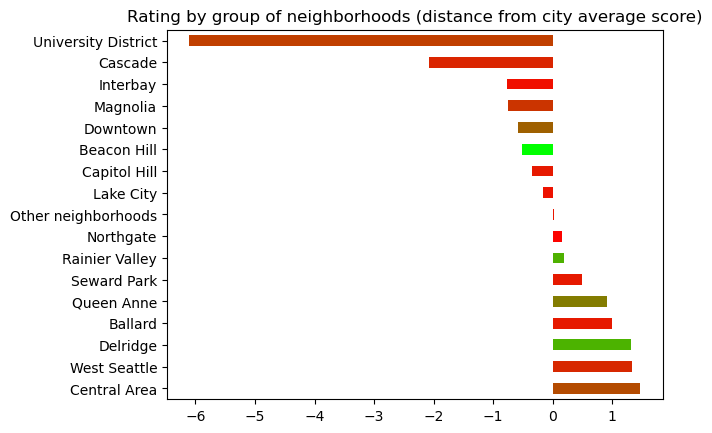

In [14]:
gradient = avg_rating_neighbourhood_gr.listings_number / max(avg_rating_neighbourhood_gr.listings_number)
colors = [(1-x, x, 0) for x in gradient]
avg_rating_neighbourhood_gr.sort_values(by = 'gap', ascending=False).plot.barh(y = 'gap',  color = colors, legend=False, xlabel = '', ylabel = 'Difference in % from the city average');
plt.title("Rating by group of neighborhoods (distance from city average score)");

##### Rating by Coordinates

Define a subset data frame with latitude and longitude for each listing

In [15]:
df_coordinates = df_ratedListings[['longitude', 'latitude']]

To avoid a skewed representation, here I remove the effect of outliers by rounding to the 10th quantile the ratings that are lower

In [16]:
quantile_10th = df_ratedListings['review_scores_rating'].quantile(0.1)
quantile_10th

87.0

In [17]:
df_coordinates['rating'] = pd.DataFrame({'col1': df_ratedListings['review_scores_rating'], 'col2': [quantile_10th for i in df_coordinates.index]}).max(axis=1) - avg_rating

C:\Users\2100\AppData\Local\Temp\ipykernel_23452\3568436600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coordinates['rating'] = pd.DataFrame({'col1': df_ratedListings['review_scores_rating'], 'col2': [quantile_10th for i in df_coordinates.index]}).max(axis=1) - avg_rating


In [18]:
df_coordinates.describe()

,longitude,latitude,rating
count,3171.000000,3171.000000,3171.000000
mean,-122.332870,47.628684,0.763797
std,0.031571,0.042962,4.258810
min,-122.417219,47.505088,-7.539262
25%,-122.353981,47.608762,-1.539262
50%,-122.328980,47.623076,1.460738
75%,-122.310570,47.662419,4.460738
max,-122.254189,47.733358,5.460738


The following scatter plot shows all listings according to their geographical coordinates.

The color of the dots represents the gap between the average rating for each listing and the city average:
- the red dots correspond to listings with lower rating
- the green dots correspond to listings with higher rating

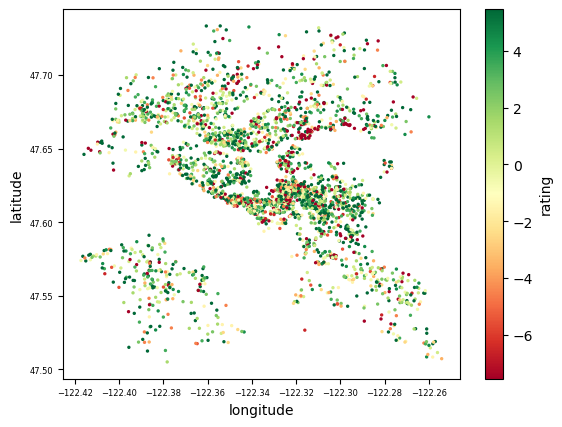

In [19]:
df_coordinates.plot.scatter(x="longitude", y="latitude", c="rating", s=2, colormap = "RdYlGn").tick_params(axis='both', labelsize=6);

### Are average ratings biased by availability density?

The following chart compares the rating scores associated to each group of neighborhoods to the average number of listings available in the same area.

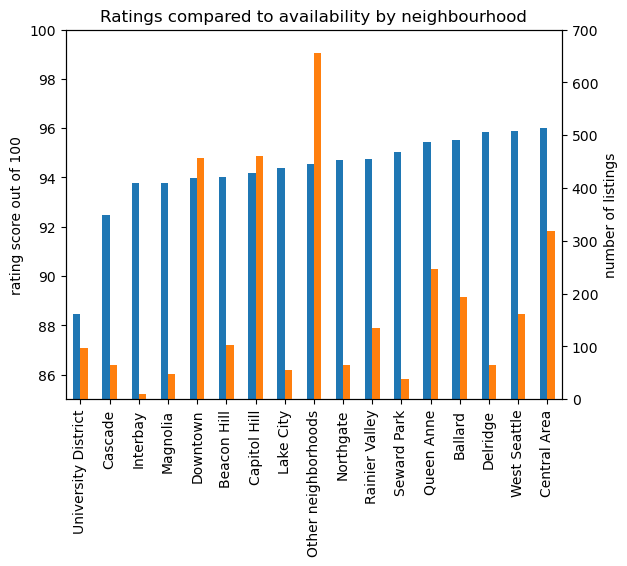

In [20]:
ax = avg_rating_neighbourhood_gr.sort_values(by = 'review_scores_rating', ascending=True).plot.bar(y = ['review_scores_rating','listings_number'], secondary_y = 'listings_number', legend=False)
ax.set_xlabel("")
ax.set_ylabel("rating score out of 100")
ax.set_ylim(85,100)
ax.right_ax.set_ylim(0,700)
ax.right_ax.set_ylabel("number of listings")
plt.title("Ratings compared to availability by neighbourhood");

### Are average ratings biased by prices?

In order to compare rating to price is first necessary to transform data in ***price*** field in numeric format

In [21]:
df_ratedListings['price_numeric'] = df_ratedListings['price'].replace(regex=[r'\$', ','], value='').astype('float64')

C:\Users\2100\AppData\Local\Temp\ipykernel_23452\9439770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratedListings['price_numeric'] = df_ratedListings['price'].replace(regex=[r'\$', ','], value='').astype('float64')


Compute the average price applied to all listings in the city

In [22]:
avg_price = df_ratedListings.price_numeric.mean()
avg_price

126.80258593503626

Add to the dataframe with statistics for each group of neighborhoods fields storing informations about prices.

Compute the average price for each group of neighborhoods.

In [23]:
avg_rating_neighbourhood_gr['price'] = df_ratedListings.groupby(['neighbourhood_group_cleansed'])['price_numeric'].mean()

In [24]:
avg_rating_neighbourhood_gr['price_gap'] = avg_rating_neighbourhood_gr['price'] - avg_price

The following chart compares the rating scores associated to each neighborhood to the average prices recorded in the same area.

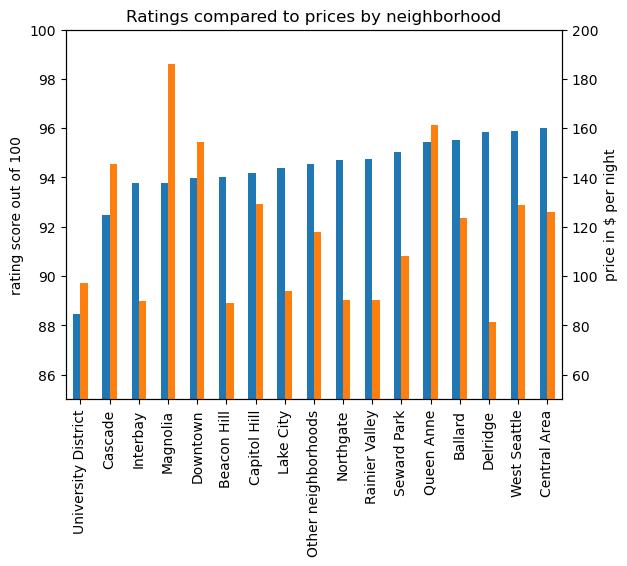

In [25]:
ax = avg_rating_neighbourhood_gr.sort_values(by = 'review_scores_rating', ascending=True).plot.bar(y = ['review_scores_rating','price'], secondary_y = 'price', legend=False)
ax.set_xlabel("")
ax.set_ylim(85,100)
ax.set_ylabel("rating score out of 100")
ax.right_ax.set_ylim(50,200)
ax.right_ax.set_ylabel("price in $ per night")
plt.title("Ratings compared to prices by neighborhood");